In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
from nltk.corpus import reuters, stopwords


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JakeDoherty_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
api_key = "231a98b7db5444ae8f09c1df4d727849"

In [6]:
# Read your api key environment variable
news_api_key = os.getenv('news_api_key')

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [16]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin_headlines['totalResults']

8046

In [9]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")
ethereum_headlines['totalResults']

3229

In [17]:
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass
    

In [18]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Bitcoin title", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,-0.2732,0.063,0.937,0.000,A fake press release claiming Kroger accepts c...,A similar hoax earlier this year tied Walmart ...
1,0.3612,0.000,0.904,0.096,Bitcoin Miners Are Gobbling Up U.S. Energy,Theres a big new presence slurping up power fr...
2,0.0000,0.000,1.000,0.000,Roughly One-Third of Bitcoin Is Controlled by ...,"For all the talk of democratizing finance, the..."
3,0.5719,0.000,0.847,0.153,AMC Begins Accepting Crypto,"In keeping with a previous announcement, AMC t..."
4,0.0000,0.000,1.000,0.000,Explainer: What we know so far about El Salvad...,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."


In [21]:
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [22]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Ethereum title", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,0.7783,0.0,0.784,0.216,The NFT Bay asks if you would steal all the JPEGs,"If you claim ownership, someone will probably ..."
1,0.5719,0.0,0.847,0.153,AMC Begins Accepting Crypto,"In keeping with a previous announcement, AMC t..."
2,0.4588,0.0,0.906,0.094,JPMorgan says ethereum is a better bet than bi...,Ethereum and bitcoin are the two biggest crypt...
3,0.5267,0.0,0.907,0.093,A meme coin named after Elon Musk rode the wav...,Elon Musk\r\npicture alliance / Getty Images\r...
4,0.4588,0.0,0.903,0.097,Obscure altcoin mana spikes 400% as Facebook's...,Cryptocurrency and business continuity line im...


In [23]:
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.134750,0.015550,0.938950,0.045450
std,0.325372,0.039944,0.064464,0.059921
min,-0.680800,0.000000,0.833000,0.000000
25%,0.000000,0.000000,0.883500,0.000000
50%,0.000000,0.000000,0.947000,0.000000
75%,0.390075,0.000000,1.000000,0.099500
max,0.571900,0.167000,1.000000,0.153000


In [24]:
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.307340,0.006200,0.916300,0.077450
std,0.340277,0.019083,0.077373,0.078558
min,-0.318200,0.000000,0.779000,0.000000
25%,0.000000,0.000000,0.862750,0.000000
50%,0.381550,0.000000,0.915500,0.074000
75%,0.549700,0.000000,1.000000,0.111750
max,0.822500,0.062000,1.000000,0.221000


In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [26]:
sw_addon = {'fucking', 'char', 'every', 'has', 'have', 'had', 'colleague'}

In [27]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
            
    return tokens

In [28]:
bitcoin_tokens = bitcoin_df.copy()

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/JakeDoherty_1/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [33]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

In [34]:
tokenized = []
for i in bitcoin_tokens['Bitcoin title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})

In [35]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

In [36]:
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text,tokens_text,tokens_title
0,-0.2732,0.063,0.937,0.000,A fake press release claiming Kroger accepts c...,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ...","[fake, press, release, claiming, kroger, accep..."
1,0.3612,0.000,0.904,0.096,Bitcoin Miners Are Gobbling Up U.S. Energy,Theres a big new presence slurping up power fr...,"[theres, big, new, presence, slurping, power, ...","[bitcoin, miners, gobbling, us, energy]"
2,0.0000,0.000,1.000,0.000,Roughly One-Third of Bitcoin Is Controlled by ...,"For all the talk of democratizing finance, the...","[talk, democratizing, finance, vast, majority,...","[roughly, onethird, bitcoin, controlled, small..."
3,0.5719,0.000,0.847,0.153,AMC Begins Accepting Crypto,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater...","[amc, begins, accepting, crypto]"
4,0.0000,0.000,1.000,0.000,Explainer: What we know so far about El Salvad...,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...","[mizata, el, salvadorlondon, nov, reuters, el,...","[explainer, know, far, el, salvadors, volcanop..."


In [37]:
ethereum_tokens = ethereum_df.copy()

In [38]:
tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [39]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [40]:
tokenized_eth = []
for i in ethereum_tokens['Ethereum title']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

In [41]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

In [42]:
ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text,tokens_text,tokens_title
0,0.7783,0.0,0.784,0.216,The NFT Bay asks if you would steal all the JPEGs,"If you claim ownership, someone will probably ...","[claim, ownership, someone, probably, want, ta...","[nft, bay, asks, would, steal, jpegs]"
1,0.5719,0.0,0.847,0.153,AMC Begins Accepting Crypto,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater...","[amc, begins, accepting, crypto]"
2,0.4588,0.0,0.906,0.094,JPMorgan says ethereum is a better bet than bi...,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, biggest, cryptocurren...","[jpmorgan, say, ethereum, better, bet, bitcoin..."
3,0.5267,0.0,0.907,0.093,A meme coin named after Elon Musk rode the wav...,Elon Musk\r\npicture alliance / Getty Images\r...,"[elon, muskpicture, alliance, getty, imagesa, ...","[meme, coin, named, elon, musk, rode, wave, jo..."
4,0.4588,0.0,0.903,0.097,Obscure altcoin mana spikes 400% as Facebook's...,Cryptocurrency and business continuity line im...,"[cryptocurrency, business, continuity, line, i...","[obscure, altcoin, mana, spike, facebooks, met..."


In [43]:
#NGrams and Frequency Analysis
from collections import Counter
from nltk import ngrams

In [44]:
all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [45]:
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [46]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [47]:
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [48]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

In [49]:
bigram_counter(bitcoin_sent)


,Bigram,Count
0,"(world, first)",3
1,"(wa, trading)",3
2,"(bitcoin, mining)",2
3,"(nov, reuters)",2
4,"(el, salvador)",2
5,"(salvador, plan)",2
6,"(plan, build)",2
7,"(build, world)",2
8,"(first, bitcoin)",2
9,"(bitcoin, city)",2


In [50]:
bigram_counter(eth_sent)

,Bigram,Count
0,"(new, york)",3
1,"(ethereum, bitcoin)",2
2,"(bitcoin, ethereum)",2
3,"(ethereum, dogecoin)",2
4,"(ha, lost)",2
5,"(rahul, rai)",2
6,"(york, nov)",2
7,"(los, angeles)",2
8,"(claim, ownership)",1
9,"(ownership, someone)",1


In [51]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Counter_words.items()), columns=['Word', 'Count'])

In [52]:
token_count(all_bitcoin_words)

,Word,Count
0,bitcoin,19
1,first,6
2,cryptocurrency,6
3,trading,5
4,new,4
5,ha,4
6,reuters,4
7,city,4
8,exchange,4
9,wa,4


In [53]:
token_count(all_eth_words)

,Word,Count
0,bitcoin,10
1,ethereum,8
2,cryptocurrency,8
3,ha,5
4,getty,4
5,york,4
6,ether,4
7,said,3
8,business,3
9,week,3


In [59]:
#WordClouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [60]:
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [61]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

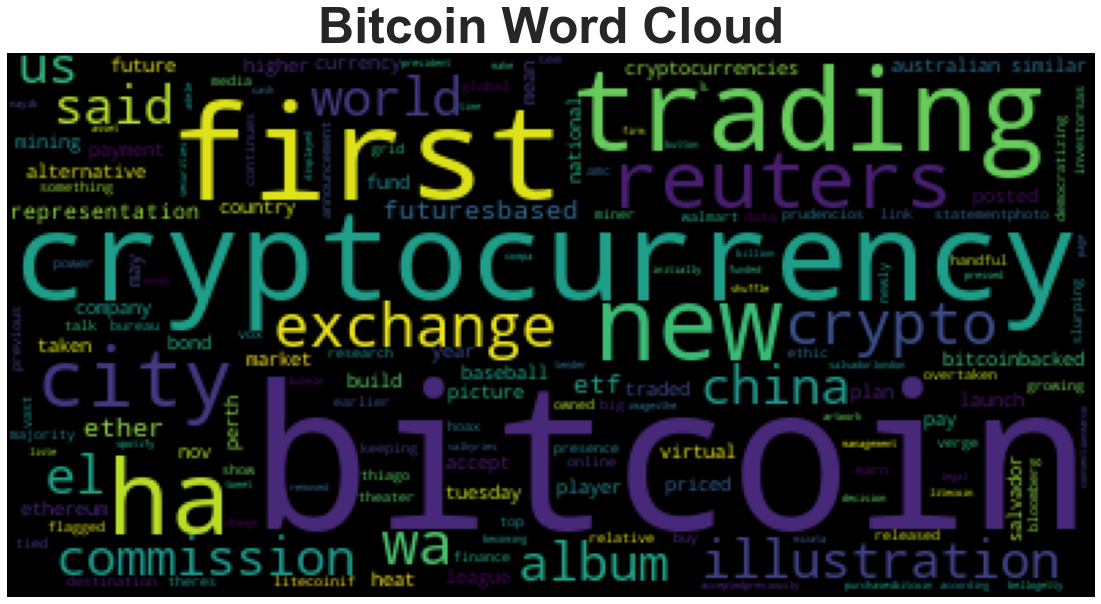

In [64]:
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

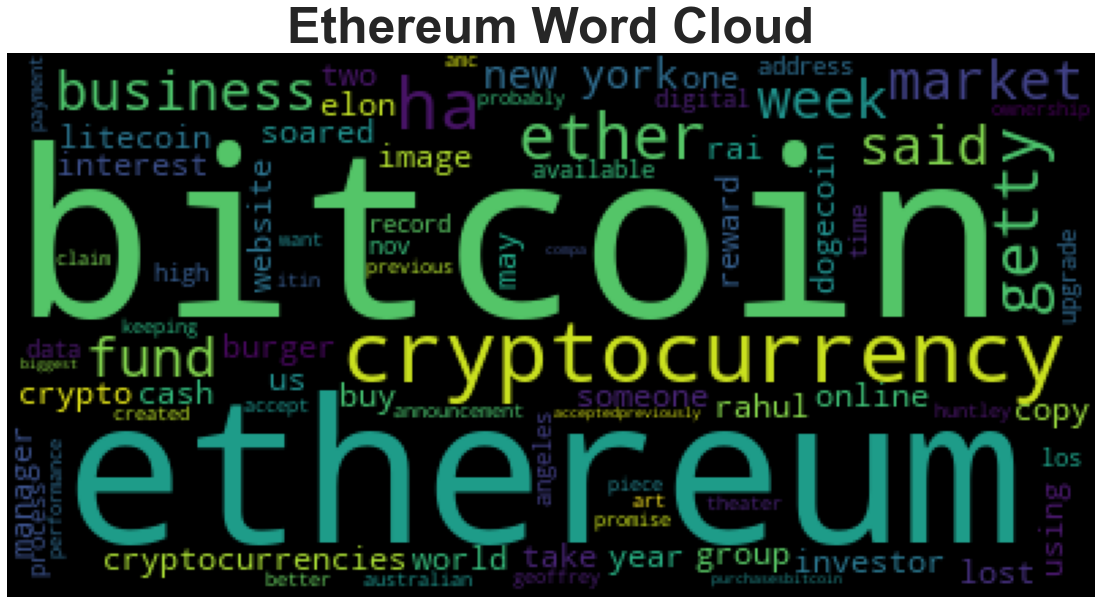

In [65]:
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

In [66]:
#Named Entity Recognition
import spacy
from spacy import displacy

In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [68]:
#BitcoinNER
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)
big_string_bitcoin

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars] For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from

In [69]:
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

In [70]:
#List all of the entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

earlier this year DATE
Verge LAW
Vox Media ORG
Photo Illustration ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bloomberg ORG
the National Bureau ORG
AMC ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
first ORDINAL
El Salvador GPE
Bitcoin City GPE
Bitcoin 2021 DATE
Marco Bello/ PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
Spotify ORG
Adele PERSON
30 CARDINAL
+3186 ORG
NurPhoto ORG
ETF ORG
first ORDINAL
ETF ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Australian Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
68,000 MONEY
Ether ORG
5k MONEY
CoinGecko ORG
more than $3 trillion MONEY
May 20, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoLONDON PERSON
Reuters ORG
60 MONEY
Tuesday DATE
Chinas National Development and Reform Commission ORG
Meng Wei PERSON
A decade ago DATE
just a few years old DATE
New York City GPE
Eric Ada

In [71]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)
big_string_eth

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana 

In [72]:
eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'
displacy.render(eth_doc, style='ent')

In [73]:
#List all of the entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

this year DATE
Australian Geoffrey Huntley PERSON
AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
beca GPE
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars ORG
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images PERSON
the past week DATE
Facebook ORG
Apple ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
1-2% PERCENT
Ethereum ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU PERSON
less than two weeks DATE
Burger King ORG
Robinhood ORG
Royal Perks ORG
5 MONEY
Getty Images ORG
Ethereum ORG
US GPE
Rahul Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Crypto PERSON
Rahul Rai PERSON
20 CARDINAL
NFT ORG
] Ether PERSON
second ORDINAL
a record above $ MONEY
4,400 MONEY
Friday DATE
Ethereum ORG
Bitcoin’s ORG
second ORDINAL
NEW YORK GPE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
Ame